In [5]:
#Others
import random
import pandas as pd
from pandas import DataFrame
from pandas import Series
import numpy as np
import math
import os
import warnings
import optuna
import joblib
import matplotlib.pyplot as plt

In [6]:
#Importing packages
#Sklearn
from sklearn import model_selection, linear_model
from sklearn.inspection import permutation_importance
from sklearn.feature_selection import RFECV,SelectFromModel
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV,RepeatedStratifiedKFold,cross_validate
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,auc,roc_auc_score,roc_curve,classification_report
from sklearn.pipeline import make_pipeline
from sklearn.svm import LinearSVC
from sklearn.datasets import load_iris
from sklearn.linear_model import Ridge, LinearRegression, Lasso
from sklearn import preprocessing

In [7]:
#Model
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LassoCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

In [8]:
os.chdir("C:/Users/A/Desktop/Bioactive/TNF-α")

In [9]:
#Reading the data
ML_data= pd.read_csv("./ML_data.csv",header=0,index_col=0)
X_NAomit_data= pd.read_csv("./X_NAomit_data.csv",header=0,index_col=0)
Raw_data = pd.read_csv('./Original_data.csv',index_col=0)

#original data(descriptors= 4175）
print(X_NAomit_data.shape)
X_NAomit_data.head()

(6175, 3228)


,MW,AMW,Sp,Si,Mp,Mi,GD,nAT,nSK,nAA,...,s1_numAroBonds,s2_numAroBonds,s3_numAroBonds,s4_numAroBonds,s34_size,s34_relSize,s34_phSize,s34_phRelSize,chiralMoment,chiralPhMoment
cid,,,,,,,,,,,,,,,,,,,,,
2083077.0,425.57,8.866042,34.7672,53.2847,0.724317,1.110098,0.078818,48.0,29.0,21.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
138703696.0,526.58,8.493226,42.4378,70.2759,0.684481,1.133482,0.058030,62.0,39.0,26.0,...,0.0,0.0,0.0,27.0,37.000000,0.948718,11.000000,0.282051,54.589376,16.822604
139316163.0,585.65,8.134028,46.5686,82.7424,0.646786,1.149200,0.053426,72.0,42.0,15.0,...,0.0,0.0,0.0,16.0,40.000000,0.952381,11.000000,0.261905,59.757845,16.822604
139315919.0,541.62,7.965000,43.8697,77.9875,0.645143,1.146875,0.056680,68.0,39.0,15.0,...,0.0,0.0,0.0,16.0,37.000000,0.948718,11.000000,0.282051,54.589376,16.822604
138703798.0,491.63,7.448939,43.0232,75.2290,0.651867,1.139833,0.063492,66.0,36.0,15.0,...,0.0,0.0,0.0,16.0,33.333333,0.925926,8.333333,0.231481,49.318632,13.379088


In [10]:
X_NAomit_data= pd.read_csv("./X_NAomit_data.csv",header=0,index_col=0)
X_NAomit_data

,MW,AMW,Sp,Si,Mp,Mi,GD,nAT,nSK,nAA,...,s1_numAroBonds,s2_numAroBonds,s3_numAroBonds,s4_numAroBonds,s34_size,s34_relSize,s34_phSize,s34_phRelSize,chiralMoment,chiralPhMoment
cid,,,,,,,,,,,,,,,,,,,,,
2083077.0,425.57,8.866042,34.7672,53.2847,0.724317,1.110098,0.078818,48.0,29.0,21.0,...,0.0,0.0,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
138703696.0,526.58,8.493226,42.4378,70.2759,0.684481,1.133482,0.058030,62.0,39.0,26.0,...,0.0,0.0,0.00,27.00,37.000000,0.948718,11.000000,0.282051,54.589376,16.822604
139316163.0,585.65,8.134028,46.5686,82.7424,0.646786,1.149200,0.053426,72.0,42.0,15.0,...,0.0,0.0,0.00,16.00,40.000000,0.952381,11.000000,0.261905,59.757845,16.822604
139315919.0,541.62,7.965000,43.8697,77.9875,0.645143,1.146875,0.056680,68.0,39.0,15.0,...,0.0,0.0,0.00,16.00,37.000000,0.948718,11.000000,0.282051,54.589376,16.822604
138703798.0,491.63,7.448939,43.0232,75.2290,0.651867,1.139833,0.063492,66.0,36.0,15.0,...,0.0,0.0,0.00,16.00,33.333333,0.925926,8.333333,0.231481,49.318632,13.379088
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2158020.0,462.06,7.831525,39.7844,66.3847,0.674312,1.125164,0.070968,59.0,31.0,15.0,...,0.0,0.0,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9631088.0,246.31,9.122593,19.6137,29.9962,0.726433,1.110970,0.132353,27.0,17.0,11.0,...,0.0,0.0,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3247362.0,463.62,7.244062,43.8243,71.3113,0.684755,1.114239,0.065546,64.0,35.0,22.0,...,0.0,1.5,9.75,11.75,31.500000,0.900000,5.000000,0.142857,30.833138,5.196152


In [11]:
col_data= pd.read_csv("./X_NAomit_data.csv",header=0,index_col=0)

In [12]:
X_NAomit_data

,MW,AMW,Sp,Si,Mp,Mi,GD,nAT,nSK,nAA,...,s1_numAroBonds,s2_numAroBonds,s3_numAroBonds,s4_numAroBonds,s34_size,s34_relSize,s34_phSize,s34_phRelSize,chiralMoment,chiralPhMoment
cid,,,,,,,,,,,,,,,,,,,,,
2083077.0,425.57,8.866042,34.7672,53.2847,0.724317,1.110098,0.078818,48.0,29.0,21.0,...,0.0,0.0,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
138703696.0,526.58,8.493226,42.4378,70.2759,0.684481,1.133482,0.058030,62.0,39.0,26.0,...,0.0,0.0,0.00,27.00,37.000000,0.948718,11.000000,0.282051,54.589376,16.822604
139316163.0,585.65,8.134028,46.5686,82.7424,0.646786,1.149200,0.053426,72.0,42.0,15.0,...,0.0,0.0,0.00,16.00,40.000000,0.952381,11.000000,0.261905,59.757845,16.822604
139315919.0,541.62,7.965000,43.8697,77.9875,0.645143,1.146875,0.056680,68.0,39.0,15.0,...,0.0,0.0,0.00,16.00,37.000000,0.948718,11.000000,0.282051,54.589376,16.822604
138703798.0,491.63,7.448939,43.0232,75.2290,0.651867,1.139833,0.063492,66.0,36.0,15.0,...,0.0,0.0,0.00,16.00,33.333333,0.925926,8.333333,0.231481,49.318632,13.379088
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2158020.0,462.06,7.831525,39.7844,66.3847,0.674312,1.125164,0.070968,59.0,31.0,15.0,...,0.0,0.0,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9631088.0,246.31,9.122593,19.6137,29.9962,0.726433,1.110970,0.132353,27.0,17.0,11.0,...,0.0,0.0,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3247362.0,463.62,7.244062,43.8243,71.3113,0.684755,1.114239,0.065546,64.0,35.0,22.0,...,0.0,1.5,9.75,11.75,31.500000,0.900000,5.000000,0.142857,30.833138,5.196152


In [13]:
threshold = 0.99  # 如果列中 0 的比例超过 90%，则移除该列
non_zero_threshold = X_NAomit_data.shape[0] * (1 - threshold)
X_NAomit_data =X_NAomit_data.loc[:, (X_NAomit_data != 0).sum(axis=0) > non_zero_threshold]

In [14]:
X_NAomit_data 

,MW,AMW,Sp,Si,Mp,Mi,GD,nAT,nSK,nAA,...,s4_numRotBonds,s2_numAroBonds,s3_numAroBonds,s4_numAroBonds,s34_size,s34_relSize,s34_phSize,s34_phRelSize,chiralMoment,chiralPhMoment
cid,,,,,,,,,,,,,,,,,,,,,
2083077.0,425.57,8.866042,34.7672,53.2847,0.724317,1.110098,0.078818,48.0,29.0,21.0,...,0.000000,0.0,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
138703696.0,526.58,8.493226,42.4378,70.2759,0.684481,1.133482,0.058030,62.0,39.0,26.0,...,6.000000,0.0,0.00,27.00,37.000000,0.948718,11.000000,0.282051,54.589376,16.822604
139316163.0,585.65,8.134028,46.5686,82.7424,0.646786,1.149200,0.053426,72.0,42.0,15.0,...,8.000000,0.0,0.00,16.00,40.000000,0.952381,11.000000,0.261905,59.757845,16.822604
139315919.0,541.62,7.965000,43.8697,77.9875,0.645143,1.146875,0.056680,68.0,39.0,15.0,...,8.000000,0.0,0.00,16.00,37.000000,0.948718,11.000000,0.282051,54.589376,16.822604
138703798.0,491.63,7.448939,43.0232,75.2290,0.651867,1.139833,0.063492,66.0,36.0,15.0,...,6.333333,0.0,0.00,16.00,33.333333,0.925926,8.333333,0.231481,49.318632,13.379088
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2158020.0,462.06,7.831525,39.7844,66.3847,0.674312,1.125164,0.070968,59.0,31.0,15.0,...,0.000000,0.0,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9631088.0,246.31,9.122593,19.6137,29.9962,0.726433,1.110970,0.132353,27.0,17.0,11.0,...,0.000000,0.0,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3247362.0,463.62,7.244062,43.8243,71.3113,0.684755,1.114239,0.065546,64.0,35.0,22.0,...,3.500000,1.5,9.75,11.75,31.500000,0.900000,5.000000,0.142857,30.833138,5.196152


In [15]:
X=np.array(X_NAomit_data)
X

array([[4.25570000e+02, 8.86604167e+00, 3.47672000e+01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [5.26580000e+02, 8.49322581e+00, 4.24378000e+01, ...,
        2.82051282e-01, 5.45893763e+01, 1.68226038e+01],
       [5.85650000e+02, 8.13402778e+00, 4.65686000e+01, ...,
        2.61904762e-01, 5.97578447e+01, 1.68226038e+01],
       ...,
       [4.63620000e+02, 7.24406250e+00, 4.38243000e+01, ...,
        1.42857143e-01, 3.08331381e+01, 5.19615242e+00],
       [2.82310000e+02, 8.06600000e+00, 2.41478000e+01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [4.77670000e+02, 8.09610169e+00, 3.95173000e+01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [16]:
X_NAomit_data 

,MW,AMW,Sp,Si,Mp,Mi,GD,nAT,nSK,nAA,...,s4_numRotBonds,s2_numAroBonds,s3_numAroBonds,s4_numAroBonds,s34_size,s34_relSize,s34_phSize,s34_phRelSize,chiralMoment,chiralPhMoment
cid,,,,,,,,,,,,,,,,,,,,,
2083077.0,425.57,8.866042,34.7672,53.2847,0.724317,1.110098,0.078818,48.0,29.0,21.0,...,0.000000,0.0,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
138703696.0,526.58,8.493226,42.4378,70.2759,0.684481,1.133482,0.058030,62.0,39.0,26.0,...,6.000000,0.0,0.00,27.00,37.000000,0.948718,11.000000,0.282051,54.589376,16.822604
139316163.0,585.65,8.134028,46.5686,82.7424,0.646786,1.149200,0.053426,72.0,42.0,15.0,...,8.000000,0.0,0.00,16.00,40.000000,0.952381,11.000000,0.261905,59.757845,16.822604
139315919.0,541.62,7.965000,43.8697,77.9875,0.645143,1.146875,0.056680,68.0,39.0,15.0,...,8.000000,0.0,0.00,16.00,37.000000,0.948718,11.000000,0.282051,54.589376,16.822604
138703798.0,491.63,7.448939,43.0232,75.2290,0.651867,1.139833,0.063492,66.0,36.0,15.0,...,6.333333,0.0,0.00,16.00,33.333333,0.925926,8.333333,0.231481,49.318632,13.379088
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2158020.0,462.06,7.831525,39.7844,66.3847,0.674312,1.125164,0.070968,59.0,31.0,15.0,...,0.000000,0.0,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9631088.0,246.31,9.122593,19.6137,29.9962,0.726433,1.110970,0.132353,27.0,17.0,11.0,...,0.000000,0.0,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3247362.0,463.62,7.244062,43.8243,71.3113,0.684755,1.114239,0.065546,64.0,35.0,22.0,...,3.500000,1.5,9.75,11.75,31.500000,0.900000,5.000000,0.142857,30.833138,5.196152


In [17]:
Raw_data

,IsomericSMILES,Activity,Canonical_smiles
cid,,,
2083077.0,CC1=CC(=C(N1C2=CC=C(C=C2)OC)C)C(=O)CSC3=NN=C(O...,1,COc1ccc(-n2c(C)cc(C(=O)CSc3nnc(-c4cccs4)o3)c2C...
138703696.0,CC(C)([C@@H](CNC(=O)C1=CN=C(C=C1NC2=CN=C(C=C2)...,1,CC(C)(O)[C@H](F)CNC(=O)c1cnc(-c2ccc3cc(C#N)cnn...
139316163.0,CC(C)([C@@H](CNC(=O)C1=CN=C(C=C1NC2CC(C2)COC(=...,1,CC(C)(O)[C@H](F)CNC(=O)c1cnc(-c2ccc3cc(C#N)cnn...
139315919.0,CC(C)([C@@H](CNC(=O)C1=CN=C(C=C1NC2CC(C2)(CNC(...,1,COC(=O)NCC1(F)CC(Nc2cc(-c3ccc4cc(C#N)cnn34)ncc...
138703798.0,CC(C)([C@@H](CNC(=O)C1=CN=C(C=C1NC2C[C@@H]3CNC...,1,CC(C)(O)[C@H](F)CNC(=O)c1cnc(-c2ccc3cc(C#N)cnn...
...,...,...,...
2158020.0,CC1=C(C2=C(N1)C=CC(=C2)Cl)CCN(CC3=CC(=C(C(=C3)...,0,CNC(=S)N(CCc1c(C)[nH]c2ccc(Cl)cc12)Cc1cc(OC)c(...
9631088.0,C1=CC(=CC(=C1)N/N=C/C2=CC=CS2)C(=O)O,0,O=C(O)c1cccc(N/N=C/c2cccs2)c1
3247362.0,C[C@H]([C@@H]1C[C@@]1(C)[C@H](C2=CC=CC=C2)NC(=...,0,C[C@@H](C(=O)Nc1ccc2ccccc2c1)[C@@H]1C[C@@]1(C)...


In [18]:
y=Raw_data['Activity']

In [19]:
Cv_model= RepeatedStratifiedKFold(n_splits=5, n_repeats=10, random_state=0)

# 1. LASSO

In [17]:
model = make_pipeline(StandardScaler(), LassoCV(cv=Cv_model)).fit(X, y)

E:\C++\anaconda\envs\hydrogel\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.15518048070794066, tolerance: 0.12219400809716599
  model = cd_fast.enet_coordinate_descent_gram(
E:\C++\anaconda\envs\hydrogel\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.13472865983499105, tolerance: 0.12219400809716599
  model = cd_fast.enet_coordinate_descent_gram(
E:\C++\anaconda\envs\hydrogel\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.37079100200207904, tolerance: 0.12219400809716599
  model = cd_fast.enet_coordinate_descent_gram(
E:\C++\anaconda\envs\hydrogel\lib\site-packages\sklearn\linear_mode

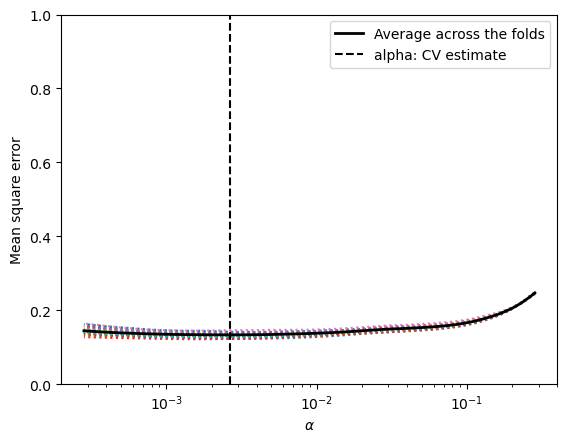

In [18]:
ymin, ymax =0, 1
lasso = model[-1]
plt.semilogx(lasso.alphas_, lasso.mse_path_, linestyle=":")
plt.plot(
    lasso.alphas_,
    lasso.mse_path_.mean(axis=-1),
    color="black",
    label="Average across the folds",
    linewidth=2,
)
plt.axvline(lasso.alpha_, linestyle="--", color="black", label="alpha: CV estimate")

plt.ylim(ymin, ymax)
plt.xlabel(r"$\alpha$")
plt.ylabel("Mean square error")
plt.legend()


In [19]:
lasso.alpha_

0.0026414491572292246

In [20]:
Cv_model= RepeatedStratifiedKFold(n_splits=5, n_repeats=10, random_state=0)

In [21]:
lsvc =  Lasso(alpha=lasso.alpha_).fit(X, y)
model = SelectFromModel(lsvc, prefit=True)
X_new = model.transform(X)
X_new.shape

E:\C++\anaconda\envs\hydrogel\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.973e+02, tolerance: 1.527e-01
  model = cd_fast.enet_coordinate_descent(


(6175, 333)

In [22]:
lasso_coef=pd.DataFrame(lsvc.coef_)
lasso_coef.index=X_NAomit_data.columns
lasso_coef.columns=["coef"]
lasso_coef


,coef
MW,0.001522
AMW,-0.004765
Sp,-0.000000
Si,-0.001728
Mp,-0.000000
...,...
s34_relSize,-0.000000
s34_phSize,0.000000
s34_phRelSize,0.000000
chiralMoment,0.000000


In [23]:
lasso_coef_last=lasso_coef[(lasso_coef["coef"]>0)|(lasso_coef["coef"]<0)]
lasso_coef_last.to_csv("./Supplementary Data S6.csv",sep=',')
lasso_coef_last.head()

,coef
MW,0.001522
AMW,-0.004765
Si,-0.001728
nAA,-0.002683
RBN,-0.000231


In [24]:
Lasso_data=X_NAomit_data[X_NAomit_data.columns[model.get_support()]]
Lasso_data

,MW,AMW,Si,nAA,RBN,H%,X%,max_conj_path,Rperim,D/Dtr03,...,nLevel4,nLevel8,arLevel2,s2_size,s4_numSharedNeighbors,s4_numRotBonds,s3_numAroBonds,s4_numAroBonds,s34_size,chiralPhMoment
cid,,,,,,,,,,,,,,,,,,,,,
2083077.0,425.57,8.866042,53.2847,21.0,7.0,39.583333,0.000000,13.0,21.0,0.000000,...,0.000000,0.0,0.00,0.000000,0.0,0.000000,0.00,0.00,0.000000,0.000000
138703696.0,526.58,8.493226,70.2759,26.0,8.0,37.096774,1.612903,17.0,26.0,0.000000,...,2.000000,3.0,0.00,1.000000,0.0,6.000000,0.00,27.00,37.000000,16.822604
139316163.0,585.65,8.134028,82.7424,15.0,10.0,41.666667,4.166667,17.0,23.0,0.000000,...,2.000000,3.0,0.00,1.000000,0.0,8.000000,0.00,16.00,40.000000,16.822604
139315919.0,541.62,7.965000,77.9875,15.0,10.0,42.647059,2.941176,17.0,19.0,0.000000,...,2.000000,3.0,0.00,1.000000,0.0,8.000000,0.00,16.00,37.000000,16.822604
138703798.0,491.63,7.448939,75.2290,15.0,7.0,45.454545,1.515152,17.0,23.0,0.000000,...,1.333333,3.0,0.00,1.666667,0.0,6.333333,0.00,16.00,33.333333,13.379088
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2158020.0,462.06,7.831525,66.3847,15.0,8.0,47.457627,1.694915,9.0,15.0,0.000000,...,0.000000,0.0,0.00,0.000000,0.0,0.000000,0.00,0.00,0.000000,0.000000
9631088.0,246.31,9.122593,29.9962,11.0,4.0,37.037037,0.000000,8.0,11.0,0.000000,...,0.000000,0.0,0.00,0.000000,0.0,0.000000,0.00,0.00,0.000000,0.000000
3247362.0,463.62,7.244062,71.3113,22.0,7.0,45.312500,0.000000,10.0,25.0,71.065768,...,4.750000,2.5,0.75,2.250000,0.0,3.500000,9.75,11.75,31.500000,5.196152


In [25]:
Lasso_data.to_csv('./Lasso_data.csv',encoding='utf-8')

In [26]:
#Scale data
Scaler = preprocessing.MinMaxScaler() #StandardScaler
Transformer =Scaler.fit(Lasso_data)
X_scaled_data=Transformer.transform(Lasso_data)
X_scaled_data =pd.DataFrame(X_scaled_data)
X_scaled_data.columns=Lasso_data.columns
X_scaled_data.index=Raw_data.index

joblib.dump(Transformer, './Lasso_Scaler_transformer.pkl')

X_scaled_data

,MW,AMW,Si,nAA,RBN,H%,X%,max_conj_path,Rperim,D/Dtr03,...,nLevel4,nLevel8,arLevel2,s2_size,s4_numSharedNeighbors,s4_numRotBonds,s3_numAroBonds,s4_numAroBonds,s34_size,chiralPhMoment
cid,,,,,,,,,,,,,,,,,,,,,
2083077.0,0.100131,0.053573,0.079943,0.42,0.049296,0.560764,0.000000,0.361111,0.218750,0.000000,...,0.000000,0.000000,0.00,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
138703696.0,0.125832,0.049251,0.106433,0.52,0.056338,0.525538,0.019355,0.472222,0.270833,0.000000,...,0.222222,0.396226,0.00,0.062500,0.0,0.056442,0.000000,0.654851,0.133940,0.133495
139316163.0,0.140863,0.045086,0.125869,0.30,0.070423,0.590278,0.050000,0.472222,0.239583,0.000000,...,0.222222,0.396226,0.00,0.062500,0.0,0.075257,0.000000,0.388060,0.144800,0.133495
139315919.0,0.129659,0.043126,0.118456,0.30,0.070423,0.604167,0.035294,0.472222,0.197917,0.000000,...,0.222222,0.396226,0.00,0.062500,0.0,0.075257,0.000000,0.388060,0.133940,0.133495
138703798.0,0.116939,0.037143,0.114155,0.30,0.049296,0.643939,0.018182,0.472222,0.239583,0.000000,...,0.148148,0.396226,0.00,0.104167,0.0,0.059578,0.000000,0.388060,0.120667,0.106170
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2158020.0,0.109415,0.041579,0.100366,0.30,0.056338,0.672316,0.020339,0.250000,0.156250,0.000000,...,0.000000,0.000000,0.00,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
9631088.0,0.054518,0.056547,0.043635,0.22,0.028169,0.524691,0.000000,0.222222,0.114583,0.000000,...,0.000000,0.000000,0.00,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
3247362.0,0.109812,0.034768,0.108047,0.44,0.049296,0.641927,0.000000,0.277778,0.260417,0.346112,...,0.527778,0.330189,0.15,0.140625,0.0,0.032925,0.716327,0.284981,0.114030,0.041234


In [20]:
#Reading the data
Lasso_data= pd.read_csv("./Lasso_data.csv",header=0,index_col=0)
Transformer= joblib.load(filename='./Lasso_Scaler_transformer.pkl')
X_scaled_data=Transformer.transform(Lasso_data)
X_scaled_data =pd.DataFrame(X_scaled_data)
X_scaled_data.columns=Lasso_data.columns
X_scaled_data.index=Raw_data.index

In [21]:
def Model_results(Model_clf,X_test,y,Cv_model):
    Model_scores= cross_validate(estimator=Model_clf, X=X_test, y=y, cv=Cv_model,scoring=( 'accuracy','f1','precision','recall','roc_auc'), return_train_score=True)
    Model_score= cross_validate(estimator=Model_clf, X=X_test, y=y, cv=Cv_model,scoring=( 'accuracy','f1','precision','recall','roc_auc'), return_train_score=False)
#Accuracy
    Model_Accuracy_test_mean=Model_scores['test_accuracy'].mean()
    Model_Accuracy_test_se=(Model_scores['test_accuracy'].std()/math.sqrt(len(Model_scores['test_accuracy']))) 
    Model_Accuracy_train_mean=Model_scores['train_accuracy'].mean()
    Model_Accuracy_train_se=(Model_scores['train_accuracy'].std()/math.sqrt(len(Model_scores['train_accuracy']))) 
#f1
    Model_f1_mean=Model_score['test_f1'].mean()
    Model_f1_se=(Model_score['test_f1'].std()/math.sqrt(len(Model_score['test_f1']))) 
#precision
    Model_precision_mean=Model_score['test_precision'].mean()
    Model_precision_se=(Model_score['test_precision'].std()/math.sqrt(len(Model_score['test_precision']))) 
#recall
    Model_recall_mean=Model_score['test_recall'].mean()
    Model_recall_se=(Model_score['test_recall'].std()/math.sqrt(len(Model_score['test_recall']))) 
#roc_auc
    Model_roc_auc_mean=Model_score['test_roc_auc'].mean()
    Model_roc_auc_se=(Model_score['test_roc_auc'].std()/math.sqrt(len(Model_score['test_roc_auc']))) 
    Model = {'Mean':[Model_Accuracy_test_mean,Model_Accuracy_train_mean,Model_f1_mean,Model_precision_mean,Model_recall_mean,Model_roc_auc_mean],
        'Se':[Model_Accuracy_test_se,Model_Accuracy_train_se,Model_f1_se,Model_precision_se,Model_recall_se,Model_roc_auc_se]}
    Model = pd.DataFrame(Model, index=['Accuracy_test','Accuracy_train','F1 Score','Precision','Recall','Roc_auc']) # 这里设定了 index 个数要和列表长度一致
    return Model

In [22]:
#Setting the KFold 
Cv_optuna= RepeatedStratifiedKFold(n_splits=5, n_repeats=10, random_state=0)
Cv_model= RepeatedStratifiedKFold(n_splits=5, n_repeats=10, random_state=0)
Cv_RFECV= RepeatedStratifiedKFold(n_splits=5, n_repeats=10, random_state=1)

In [23]:
#Data pre-processing of models
X=np.array(X_scaled_data)
y=Raw_data['Activity'].values

## 1.1 DT

In [24]:
clf=DecisionTreeClassifier(random_state=0)

In [25]:
#Model1 （4175 descriptors）
Model1_clf=clf
#Model1
Model1=Model_results(Model1_clf,X,y,Cv_model)
Model1

,Mean,Se
Accuracy_test,0.774494,0.001772
Accuracy_train,0.998433,0.000053
F1 Score,0.795780,0.001632
Precision,0.794873,0.001899
Recall,0.796916,0.002302
Roc_auc,0.772521,0.001802


In [26]:
#Tuning hyperparameters
#Step 1. Define an objective function to be maximized.
def objective(trial):
    param = {
        'max_depth': trial.suggest_int('max_depth',3,5,1),
        'max_features' : trial.suggest_int("max_features",10,20,1),
        'min_samples_split':trial.suggest_int('min_samples_split',2,25,1)
    }
    model = DecisionTreeClassifier(**param,random_state=1)

 
# Step 2: Scoring method:
    score = model_selection.cross_val_score(model, X, y, n_jobs=12, scoring="accuracy",cv=Cv_optuna)
    accuracy = score.mean()
    return accuracy
 
# Step 3: Running it
study = optuna.create_study(direction="maximize",sampler=optuna.samplers.TPESampler(seed=0))
study.optimize(objective, n_trials=100, show_progress_bar=False)


[I 2024-11-16 01:03:20,473] A new study created in memory with name: no-name-3bd916f5-f242-4f90-b365-23afec28ec23
[I 2024-11-16 01:03:24,260] Trial 0 finished with value: 0.7452793522267207 and parameters: {'max_depth': 4, 'max_features': 17, 'min_samples_split': 16}. Best is trial 0 with value: 0.7452793522267207.
[I 2024-11-16 01:03:24,695] Trial 1 finished with value: 0.7461862348178135 and parameters: {'max_depth': 4, 'max_features': 14, 'min_samples_split': 17}. Best is trial 1 with value: 0.7461862348178135.
[I 2024-11-16 01:03:25,235] Trial 2 finished with value: 0.7396113360323886 and parameters: {'max_depth': 4, 'max_features': 19, 'min_samples_split': 25}. Best is trial 1 with value: 0.7461862348178135.
[I 2024-11-16 01:03:25,839] Trial 3 finished with value: 0.7502186234817815 and parameters: {'max_depth': 4, 'max_features': 18, 'min_samples_split': 14}. Best is trial 3 with value: 0.7502186234817815.
[I 2024-11-16 01:03:26,492] Trial 4 finished with value: 0.755222672064777

In [27]:
# Getting the best parameters:
print(f"The best parameters are : \n{study.best_params}")
# Setting the best model
clf =DecisionTreeClassifier(max_depth = study.best_params['max_depth']
              ,max_features = study.best_params['max_features']
              #,n_estimators = study.best_params['n_estimators']
              #,learning_rate = study.best_params['learning_rate']
              ,min_samples_split= study.best_params['min_samples_split']
              ,random_state=1)

The best parameters are : 
{'max_depth': 4, 'max_features': 20, 'min_samples_split': 2}


In [28]:
#Model2
Model2=Model_results(clf,X,y,Cv_model)
Model2

,Mean,Se
Accuracy_test,0.755271,0.001920
Accuracy_train,0.766312,0.000759
F1 Score,0.798802,0.002613
Precision,0.731317,0.003648
Recall,0.885609,0.009367
Roc_auc,0.841363,0.001637


In [29]:
#Saving the data of model performance
Model_data=pd.concat([Model1,Model2],axis=1)
Model_data.columns = [['DT']*4,['Model 1','Model 1', 'Model 2','Model 2'], ['Mean', 'Se', 'Mean', 'Se']]  
Model_data.columns.names=['Method','Model','Values']
Model_data.to_csv("./DT_model_lasso_data.csv",sep=',')
Model_data

Method                DT                              
Model            Model 1             Model 2          
Values              Mean        Se      Mean        Se
Accuracy_test   0.774494  0.001772  0.755271  0.001920
Accuracy_train  0.998433  0.000053  0.766312  0.000759
F1 Score        0.795780  0.001632  0.798802  0.002613
Precision       0.794873  0.001899  0.731317  0.003648
Recall          0.796916  0.002302  0.885609  0.009367
Roc_auc         0.772521  0.001802  0.841363  0.001637

## 1.2 LR

In [30]:
clf=LogisticRegression(solver='liblinear',random_state=0,dual=False)

In [31]:
#Model1 
Model1_clf=clf
#Model1
Model1=Model_results(Model1_clf,X,y,Cv_model)
Model1

,Mean,Se
Accuracy_test,0.797457,0.001394
Accuracy_train,0.813190,0.000392
F1 Score,0.821570,0.001244
Precision,0.798959,0.001621
Recall,0.845727,0.002045
Roc_auc,0.896650,0.001078


In [32]:
#Tuning hyperparameters
#Step 1. Define an objective function to be maximized.
def objective(trial):
    logreg_c = trial.suggest_float("logreg_c", 1e-3,  1e3, log=True)
    l1_ratio = trial.suggest_float("l1_ratio",0.1,1,log=False) 
    #penalty = trial.suggest_categorical("penalty",['l1','l2'])
    max_iter = trial.suggest_int("max_iter", 100,2000)
    model =LogisticRegression(C=logreg_c,
                              max_iter=max_iter,
                              l1_ratio=l1_ratio,
                              solver='liblinear',random_state=1)
    
# Step 2: Scoring method:
    score = model_selection.cross_val_score(model, X, y, n_jobs=8, scoring="accuracy",cv=Cv_optuna)
    accuracy = score.mean()
    return accuracy

# Step 3: Running it
study = optuna.create_study(direction="maximize",sampler=optuna.samplers.TPESampler(seed=1))
study.optimize(objective, n_trials=100, show_progress_bar=False)


[I 2024-11-16 01:04:38,842] A new study created in memory with name: no-name-332d800e-cfc3-42e7-b5be-c8c8c6667280
[I 2024-11-16 01:04:46,312] Trial 0 finished with value: 0.7937489878542511 and parameters: {'logreg_c': 0.3177840006884068, 'l1_ratio': 0.7482920440979423, 'max_iter': 100}. Best is trial 0 with value: 0.7937489878542511.
[I 2024-11-16 01:04:49,243] Trial 1 finished with value: 0.7787368421052631 and parameters: {'logreg_c': 0.0651621545821569, 'l1_ratio': 0.23208030173540176, 'max_iter': 275}. Best is trial 0 with value: 0.7937489878542511.
[I 2024-11-16 01:04:51,217] Trial 2 finished with value: 0.7527935222672066 and parameters: {'logreg_c': 0.013108749615263334, 'l1_ratio': 0.411004654338743, 'max_iter': 854}. Best is trial 0 with value: 0.7937489878542511.
[I 2024-11-16 01:04:58,888] Trial 3 finished with value: 0.7994979757085021 and parameters: {'logreg_c': 1.7096232052870346, 'l1_ratio': 0.4772750629629653, 'max_iter': 1402}. Best is trial 3 with value: 0.799497975

In [33]:
# Getting the best parameters:
print(f"The best parameters are : \n{study.best_params}")
# Setting the best model
clf=LogisticRegression(C=study.best_params['logreg_c'],
                              max_iter=study.best_params['max_iter'],
                              l1_ratio=study.best_params['l1_ratio'],
                              solver='liblinear',
                              random_state=1)

The best parameters are : 
{'logreg_c': 480.7815122005421, 'l1_ratio': 0.6943576864503579, 'max_iter': 650}


In [34]:
#Model2
Model2=Model_results(clf,X,y,Cv_model)
Model2

E:\C++\anaconda\envs\hydrogel\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
E:\C++\anaconda\envs\hydrogel\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
E:\C++\anaconda\envs\hydrogel\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
E:\C++\anaconda\envs\hydrogel\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
E:\C++\anaconda\envs\hydrogel\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
E:\C++\anaconda

,Mean,Se
Accuracy_test,0.808680,0.001430
Accuracy_train,0.841907,0.000393
F1 Score,0.829373,0.001314
Precision,0.816000,0.001531
Recall,0.843377,0.002039
Roc_auc,0.902592,0.001069


In [35]:
#Saving the data of model performance
Model_data=pd.concat([Model1,Model2],axis=1)
Model_data.columns = [['LR']*4,['Model 1','Model 1', 'Model 2','Model 2'], ['Mean', 'Se', 'Mean', 'Se']]  
Model_data.columns.names=['Method','Model','Values']
Model_data.to_csv("./LR_model_lasso_data.csv",sep=',')
Model_data

Method                LR                              
Model            Model 1             Model 2          
Values              Mean        Se      Mean        Se
Accuracy_test   0.797457  0.001394  0.808680  0.001430
Accuracy_train  0.813190  0.000392  0.841907  0.000393
F1 Score        0.821570  0.001244  0.829373  0.001314
Precision       0.798959  0.001621  0.816000  0.001531
Recall          0.845727  0.002045  0.843377  0.002039
Roc_auc         0.896650  0.001078  0.902592  0.001069

## 1.3 RF

In [36]:
clf=RandomForestClassifier(random_state=0)

In [37]:
#Model1 （4175 descriptors）
Model1_clf=clf
#Model1
Model1=Model_results(Model1_clf,X,y,Cv_model)
Model1

,Mean,Se
Accuracy_test,0.821879,0.001555
Accuracy_train,0.998433,0.000053
F1 Score,0.844143,0.001350
Precision,0.815738,0.001724
Recall,0.874802,0.001992
Roc_auc,0.915202,0.000983


In [38]:
#Tuning hyperparameters
#Step 1. Define an objective function to be maximized.
def objective(trial):
    n_estimators = trial.suggest_int("n_estimators",100,1000,1) 
    max_depth = trial.suggest_int("max_depth",5,20,1)
    max_features = trial.suggest_int("max_features",5,30,1)
    min_impurity_decrease = trial.suggest_float("min_impurity_decrease",0,5,log=False) 
    model = RandomForestClassifier(n_estimators = n_estimators
              ,max_depth = max_depth
              ,max_features = max_features
              ,min_impurity_decrease = min_impurity_decrease
              ,random_state=1
              ,verbose=False
              ,n_jobs=8)

# Step 2: Scoring method:
    score = model_selection.cross_val_score(model, X, y, n_jobs=8, scoring="accuracy",cv=Cv_optuna)
    accuracy = score.mean()
    return accuracy
 
# Step 3: Running it
study = optuna.create_study(direction="maximize",sampler=optuna.samplers.TPESampler(seed=0))
study.optimize(objective, n_trials=100, show_progress_bar=False)

[I 2024-11-16 02:16:51,092] A new study created in memory with name: no-name-25929d10-5859-4443-aa09-94574fdce85e
[I 2024-11-16 02:17:04,312] Trial 0 finished with value: 0.5514170040485831 and parameters: {'n_estimators': 594, 'max_depth': 16, 'max_features': 20, 'min_impurity_decrease': 2.724415914984484}. Best is trial 0 with value: 0.5514170040485831.
[I 2024-11-16 02:17:12,629] Trial 1 finished with value: 0.5514170040485831 and parameters: {'n_estimators': 481, 'max_depth': 15, 'max_features': 16, 'min_impurity_decrease': 4.4588650039103985}. Best is trial 0 with value: 0.5514170040485831.
[I 2024-11-16 02:17:31,468] Trial 2 finished with value: 0.5514170040485831 and parameters: {'n_estimators': 968, 'max_depth': 11, 'max_features': 25, 'min_impurity_decrease': 2.644474598764522}. Best is trial 0 with value: 0.5514170040485831.
[I 2024-11-16 02:17:39,794] Trial 3 finished with value: 0.5514170040485831 and parameters: {'n_estimators': 611, 'max_depth': 19, 'max_features': 6, 'mi

In [39]:
# Getting the best parameters:
print(f"The best parameters are : \n{study.best_params}")
# Setting the best model
clf=RandomForestClassifier(n_estimators = study.best_params['n_estimators']
              ,max_depth = study.best_params['max_depth']
              ,max_features = study.best_params['max_features']
              ,min_impurity_decrease = study.best_params['min_impurity_decrease']
              ,random_state=0
              ,verbose=False
              ,n_jobs=8)

The best parameters are : 
{'n_estimators': 861, 'max_depth': 8, 'max_features': 28, 'min_impurity_decrease': 0.00073920996096735}


In [40]:
#Model2
Model2=Model_results(clf,X,y,Cv_model)
Model2

,Mean,Se
Accuracy_test,0.801571,0.001639
Accuracy_train,0.874895,0.000510
F1 Score,0.834178,0.001313
Precision,0.773785,0.001773
Recall,0.905051,0.002009
Roc_auc,0.901753,0.001233


In [41]:
#Saving the data of model performance
Model_data=pd.concat([Model1,Model2],axis=1)
Model_data.columns = [['RF']*4,['Model 1','Model 1', 'Model 2','Model 2'], ['Mean', 'Se', 'Mean', 'Se']]  
Model_data.columns.names=['Method','Model','Values']
Model_data.to_csv("./RF_model_lasso_data.csv",sep=',')
Model_data

Method                RF                              
Model            Model 1             Model 2          
Values              Mean        Se      Mean        Se
Accuracy_test   0.821879  0.001555  0.801571  0.001639
Accuracy_train  0.998433  0.000053  0.874895  0.000510
F1 Score        0.844143  0.001350  0.834178  0.001313
Precision       0.815738  0.001724  0.773785  0.001773
Recall          0.874802  0.001992  0.905051  0.002009
Roc_auc         0.915202  0.000983  0.901753  0.001233

## 1.4 XGBoost

In [42]:
clf=xgb.XGBClassifier(random_state=0)

In [43]:
#Model1 
Model1_clf=clf
#Model1
Model1=Model_results(Model1_clf,X,y,Cv_model)
Model1

,Mean,Se
Accuracy_test,0.825263,0.001417
Accuracy_train,0.998433,0.000053
F1 Score,0.845006,0.001306
Precision,0.827040,0.001578
Recall,0.864023,0.002262
Roc_auc,0.918109,0.001021


In [44]:
#Tuning hyperparameters
#Step 1. Define an objective function to be maximized.
def objective(trial):
    param = {
        'lambda': trial.suggest_loguniform('lambda', 1e-3, 10.0),
        'alpha': trial.suggest_loguniform('alpha', 1e-3, 10.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.3,1.0,step=0.1),
        'subsample': trial.suggest_float('subsample', 0.4, 1.0, step=0.1),
        'learning_rate': trial.suggest_float('learning_rate', 0.0001, 0.2, step=0.005),
        'n_estimators': trial.suggest_int("n_estimators",50,1000,1)
        #'min_child_weight': trial.suggest_int('min_child_weight', 1, 300),
    }
    model = xgb.XGBClassifier(**param,random_state=1,n_jobs=8)

 
# Step 2: Scoring method:
    score = model_selection.cross_val_score(model, X, y, n_jobs=8, scoring="accuracy",cv=Cv_optuna)
    accuracy = score.mean()
    return accuracy

# Step 3: Running it
study = optuna.create_study(direction="maximize",sampler=optuna.samplers.TPESampler(seed=0))
study.optimize(objective, n_trials=100, show_progress_bar=False)


[I 2024-11-16 02:56:32,799] A new study created in memory with name: no-name-fb98c9cb-7e1f-4f1a-9a8f-3eeba6bc9870
C:\Users\A\AppData\Local\Temp\ipykernel_78252\2666013998.py:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda': trial.suggest_loguniform('lambda', 1e-3, 10.0),
C:\Users\A\AppData\Local\Temp\ipykernel_78252\2666013998.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'alpha': trial.suggest_loguniform('alpha', 1e-3, 10.0),
E:\C++\anaconda\envs\hydrogel\lib\site-packages\optuna\distributions.py:668: UserWarning: The distribution is specified by [0.0001, 0.2] and step=0.005, but the range is not divisible by `step`. It will be 

In [45]:
# Getting the best parameters:
print(f"The best parameters are : \n{study.best_params}")
# Setting the best model
clf=xgb.XGBClassifier(alpha = study.best_params['alpha']
              ,colsample_bytree = study.best_params['colsample_bytree']
              ,subsample = study.best_params['subsample']
              ,n_estimators = study.best_params['n_estimators']
              ,learning_rate= study.best_params['learning_rate'], n_jobs=8
              ,random_state=0)

The best parameters are : 
{'lambda': 1.5639845554549834, 'alpha': 0.8887736907873799, 'colsample_bytree': 1.0, 'subsample': 0.8, 'learning_rate': 0.0451, 'n_estimators': 939}


In [46]:
#Model2
Model2=Model_results(clf,X,y,Cv_model)
Model2

,Mean,Se
Accuracy_test,0.833360,0.001281
Accuracy_train,0.998433,0.000053
F1 Score,0.852611,0.001139
Precision,0.832289,0.001556
Recall,0.874156,0.001885
Roc_auc,0.924063,0.000899


In [47]:
#Saving the data of model performance
Model_data=pd.concat([Model1,Model2],axis=1)
Model_data.columns = [['XGB']*4,['Model 1','Model 1', 'Model 2','Model 2'], ['Mean', 'Se', 'Mean', 'Se']]  
Model_data.columns.names=['Method','Model','Values']
Model_data.to_csv("./XGB_model_lasso_data.csv",sep=',')
Model_data

Method               XGB                              
Model            Model 1             Model 2          
Values              Mean        Se      Mean        Se
Accuracy_test   0.825263  0.001417  0.833360  0.001281
Accuracy_train  0.998433  0.000053  0.998433  0.000053
F1 Score        0.845006  0.001306  0.852611  0.001139
Precision       0.827040  0.001578  0.832289  0.001556
Recall          0.864023  0.002262  0.874156  0.001885
Roc_auc         0.918109  0.001021  0.924063  0.000899

# 2. MLREM

In [48]:
col_data= pd.read_csv("./Results/MLREM_col.csv",header=0,index_col=0)

FileNotFoundError: [Errno 2] No such file or directory: './Results/MLREM_col.csv'

In [91]:
MRLEM_data=X_NAomit_data[col_data.index]
MRLEM_data

,MW,D/Dtr09,ZM1MulPer,ECC,CENT,SMTI,SMTIV,GMTIV,Wap,IDMT,...,ATSC5s,P_VSA_MR_3,P_VSA_ppp_ar,P_VSA_ppp_con,P_VSA_charge_2,SM15_EA(ed),T(O..Br),TPSA(Tot),SAdon,Vx
ID,,,,,,,,,,,,,,,,,,,,,
Ma_2019_A,267.28,66.871159,348.869542,135.0,383.0,2886.0,5576.0,10547.0,5729.0,4739.692713,...,90.763661,139.049917,75.680233,63.202194,1.899093,36.892542,0.0,139.54,160.947217,291.295681
Ma_2019_U,244.23,0.000000,340.039426,118.0,295.0,2084.0,4432.0,8734.0,2194.0,3416.557603,...,139.839496,139.049917,0.000000,48.373245,46.279992,36.205320,0.0,124.78,146.060780,262.840532
Ma_2019_C,243.25,0.000000,319.988367,118.0,295.0,2084.0,4240.0,7972.0,2194.0,3416.557603,...,137.031903,139.049917,0.000000,67.057867,3.124314,36.205320,0.0,130.83,160.947217,269.667774
Ma_2019_G,283.28,71.547747,387.546658,144.0,446.0,3270.0,6542.0,12768.0,6578.0,5547.544286,...,117.471961,139.049917,32.387883,80.922082,45.054770,36.939118,0.0,159.51,178.957968,301.046512
Ma_2019_dA,251.28,63.146800,315.599992,128.0,336.0,2584.0,4822.0,8812.0,5068.0,4099.715332,...,52.221046,96.366574,75.680233,63.202194,1.899093,36.335611,0.0,119.31,118.263874,281.544850
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Tang_2019_ArabinoC,243.25,0.000000,319.988367,118.0,295.0,2084.0,4240.0,7972.0,2194.0,3416.557603,...,137.031903,139.049917,0.000000,67.057867,3.124314,36.205320,0.0,130.83,160.947217,269.667774
Tang_2019_DideoxyC,211.25,0.000000,253.494297,103.0,213.0,1585.0,2963.0,5062.0,1633.0,2398.199373,...,59.519699,53.683231,0.000000,67.057867,3.124314,34.619300,0.0,90.37,75.580531,250.166113
Peters_2014_3,268.26,66.871159,369.000658,135.0,383.0,2886.0,5763.0,11275.0,5729.0,4739.692713,...,100.945467,139.049917,32.387883,87.641582,27.044020,36.892542,0.0,133.49,146.060780,284.468439


In [92]:
#Scale data
Scaler = preprocessing.MinMaxScaler() #StandardScaler
Transformer =Scaler.fit(MRLEM_data)
X_scaled_data=Transformer.transform(MRLEM_data)
X_scaled_data =pd.DataFrame(X_scaled_data)
X_scaled_data.columns=MRLEM_data.columns
X_scaled_data.index=Raw_data.index
X_scaled_data.to_csv("./Original data/MRLEM_data_X_scaled_data.csv",sep=',',header=1,index=1)
joblib.dump(Transformer, './Models/MRLEM_data_Scaler_transformer.pkl')

X_scaled_data.head()

,MW,D/Dtr09,ZM1MulPer,ECC,CENT,SMTI,SMTIV,GMTIV,Wap,IDMT,...,ATSC5s,P_VSA_MR_3,P_VSA_ppp_ar,P_VSA_ppp_con,P_VSA_charge_2,SM15_EA(ed),T(O..Br),TPSA(Tot),SAdon,Vx
ID,,,,,,,,,,,,,,,,,,,,,
Ma_2019_A,0.128645,0.181294,0.193207,0.036281,0.026667,0.030815,0.037803,0.044265,0.024087,0.024617,...,0.176802,0.999046,0.285905,0.104723,0.015761,0.446054,0.0,0.472652,0.769847,0.069993
Ma_2019_U,0.075722,0.000000,0.175319,0.017007,0.012863,0.011819,0.021252,0.029633,0.003299,0.010706,...,0.401921,0.999046,0.000000,0.031193,0.384100,0.311208,0.0,0.330770,0.665700,0.021569
Ma_2019_C,0.073472,0.000000,0.134701,0.017007,0.012863,0.011819,0.018475,0.023484,0.003299,0.010706,...,0.389042,0.999046,0.000000,0.123842,0.025930,0.311208,0.0,0.388926,0.769847,0.033187
Ma_2019_G,0.165381,0.193972,0.271557,0.046485,0.036549,0.039910,0.051778,0.062188,0.029080,0.033111,...,0.299317,0.999046,0.122355,0.192589,0.373931,0.455193,0.0,0.664616,0.895853,0.086587
Ma_2019_dA,0.091909,0.171197,0.125811,0.028345,0.019294,0.023662,0.026894,0.030263,0.020200,0.017889,...,0.000000,0.666030,0.285905,0.104723,0.015761,0.336774,0.0,0.278189,0.471230,0.053399


In [93]:
def Model_results(Model_clf,X_test,y,Cv_model):
    Model_scores= cross_validate(estimator=Model_clf, X=X_test, y=y, cv=Cv_model,scoring=( 'accuracy','f1','precision','recall','roc_auc'), return_train_score=True)
    Model_score= cross_validate(estimator=Model_clf, X=X_test, y=y, cv=Cv_model,scoring=( 'accuracy','f1','precision','recall','roc_auc'), return_train_score=False)
#Accuracy
    Model_Accuracy_test_mean=Model_scores['test_accuracy'].mean()
    Model_Accuracy_test_se=(Model_scores['test_accuracy'].std()/math.sqrt(len(Model_scores['test_accuracy']))) 
    Model_Accuracy_train_mean=Model_scores['train_accuracy'].mean()
    Model_Accuracy_train_se=(Model_scores['train_accuracy'].std()/math.sqrt(len(Model_scores['train_accuracy']))) 
#f1
    Model_f1_mean=Model_score['test_f1'].mean()
    Model_f1_se=(Model_score['test_f1'].std()/math.sqrt(len(Model_score['test_f1']))) 
#precision
    Model_precision_mean=Model_score['test_precision'].mean()
    Model_precision_se=(Model_score['test_precision'].std()/math.sqrt(len(Model_score['test_precision']))) 
#recall
    Model_recall_mean=Model_score['test_recall'].mean()
    Model_recall_se=(Model_score['test_recall'].std()/math.sqrt(len(Model_score['test_recall']))) 
#roc_auc
    Model_roc_auc_mean=Model_score['test_roc_auc'].mean()
    Model_roc_auc_se=(Model_score['test_roc_auc'].std()/math.sqrt(len(Model_score['test_roc_auc']))) 
    Model = {'Mean':[Model_Accuracy_test_mean,Model_Accuracy_train_mean,Model_f1_mean,Model_precision_mean,Model_recall_mean,Model_roc_auc_mean],
        'Se':[Model_Accuracy_test_se,Model_Accuracy_train_se,Model_f1_se,Model_precision_se,Model_recall_se,Model_roc_auc_se]}
    Model = pd.DataFrame(Model, index=['Accuracy_test','Accuracy_train','F1 Score','Precision','Recall','Roc_auc'])
    return Model

In [94]:
#Setting the KFold 
Cv_optuna= RepeatedStratifiedKFold(n_splits=5, n_repeats=10, random_state=0)
Cv_model= RepeatedStratifiedKFold(n_splits=5, n_repeats=10, random_state=0)
Cv_RFECV= RepeatedStratifiedKFold(n_splits=5, n_repeats=10, random_state=1)


In [95]:
#Data pre-processing of models
X=np.array(X_scaled_data)
y=Raw_data['Hydrogel-forming ability'].values
clf=LogisticRegression(solver='liblinear',random_state=0,dual=False)

## 2.1 DT

In [139]:
clf=DecisionTreeClassifier(random_state=0)

In [96]:
#Model1 
Model1_clf=clf
#Model1
Model1=Model_results(Model1_clf,X,y,Cv_model)
Model1

,Mean,Se
Accuracy_test,0.629333,0.015032
Accuracy_train,0.729981,0.004700
F1 Score,0.697627,0.013235
Precision,0.620752,0.011961
Recall,0.811071,0.020893
Roc_auc,0.664796,0.020543


In [97]:
#Tuning hyperparameters
#Step 1. Define an objective function to be maximized.
def objective(trial):
    param = {
        'max_depth': trial.suggest_int('max_depth',3,5,1),
        'max_features' : trial.suggest_int("max_features",10,20,1),
        'min_samples_split':trial.suggest_int('min_samples_split',2,25,1)
    }
    model = DecisionTreeClassifier(**param,random_state=1)

 
# Step 2: Scoring method:
    score = model_selection.cross_val_score(model, X, y, n_jobs=8, scoring="accuracy",cv=Cv_optuna)
    accuracy = score.mean()
    return accuracy
 
# Step 3: Running it
study = optuna.create_study(direction="maximize",sampler=optuna.samplers.TPESampler(seed=0))
study.optimize(objective, n_trials=100, show_progress_bar=False)


[I 2024-01-12 01:29:56,212] A new study created in memory with name: no-name-6a0b1671-0ec2-4905-98f9-69d2f7e33654
[I 2024-01-12 01:29:57,476] Trial 0 finished with value: 0.6312380952380953 and parameters: {'max_depth': 4, 'max_features': 17, 'min_samples_split': 16}. Best is trial 0 with value: 0.6312380952380953.
[I 2024-01-12 01:29:57,505] Trial 1 finished with value: 0.5926666666666667 and parameters: {'max_depth': 4, 'max_features': 14, 'min_samples_split': 17}. Best is trial 0 with value: 0.6312380952380953.
[I 2024-01-12 01:29:57,530] Trial 2 finished with value: 0.6375238095238095 and parameters: {'max_depth': 4, 'max_features': 19, 'min_samples_split': 25}. Best is trial 2 with value: 0.6375238095238095.
[I 2024-01-12 01:29:57,554] Trial 3 finished with value: 0.6208571428571428 and parameters: {'max_depth': 4, 'max_features': 18, 'min_samples_split': 14}. Best is trial 2 with value: 0.6375238095238095.
[I 2024-01-12 01:29:57,579] Trial 4 finished with value: 0.629619047619047

In [100]:
# Getting the best parameters:
print(f"The best parameters are : \n{study.best_params}")
# Setting the best model
clf =DecisionTreeClassifier(max_depth = study.best_params['max_depth']
              ,max_features = study.best_params['max_features']
              #,n_estimators = study.best_params['n_estimators']
              #,learning_rate = study.best_params['learning_rate']
              ,min_samples_split= study.best_params['min_samples_split']
              ,random_state=1)

The best parameters are : 
{'max_depth': 5, 'max_features': 13, 'min_samples_split': 3}


In [102]:
#Model2
Model2=Model_results(clf,X,y,Cv_model)
Model2

,Mean,Se
Accuracy_test,0.680000,0.012329
Accuracy_train,0.925345,0.005584
F1 Score,0.706865,0.012092
Precision,0.698240,0.013460
Recall,0.735714,0.020076
Roc_auc,0.690561,0.015281


In [103]:
#Saving the data of model performance
Model_data=pd.concat([Model1,Model2],axis=1)
Model_data.columns = [['DT']*4,['Model 1','Model 1', 'Model 2','Model 2'], ['Mean', 'Se', 'Mean', 'Se']]  
Model_data.columns.names=['Method','Model','Values']
Model_data.to_csv("./Results/DT_model_mlrem_data.csv",sep=',')
Model_data

Method                DT                              
Model            Model 1             Model 2          
Values              Mean        Se      Mean        Se
Accuracy_test   0.629333  0.015032  0.680000  0.012329
Accuracy_train  0.729981  0.004700  0.925345  0.005584
F1 Score        0.697627  0.013235  0.706865  0.012092
Precision       0.620752  0.011961  0.698240  0.013460
Recall          0.811071  0.020893  0.735714  0.020076
Roc_auc         0.664796  0.020543  0.690561  0.015281

## 2.2 LR

In [104]:
#Model1
Model1_clf=clf
#Model1
Model1=Model_results(Model1_clf,X,y,Cv_model)
Model1

,Mean,Se
Accuracy_test,0.680000,0.012329
Accuracy_train,0.925345,0.005584
F1 Score,0.706865,0.012092
Precision,0.698240,0.013460
Recall,0.735714,0.020076
Roc_auc,0.690561,0.015281


In [105]:
#Tuning hyperparameters
#Step 1. Define an objective function to be maximized.
def objective(trial):
    logreg_c = trial.suggest_float("logreg_c", 1e-3,  1e3, log=True)
    l1_ratio = trial.suggest_float("l1_ratio",0.1,1,log=False) 
    #penalty = trial.suggest_categorical("penalty",['l1','l2'])
    max_iter = trial.suggest_int("max_iter", 100,2000)
    model =LogisticRegression(C=logreg_c,
                              max_iter=max_iter,
                              l1_ratio=l1_ratio,
                              solver='liblinear',random_state=1)
    
# Step 2: Scoring method:
    score = model_selection.cross_val_score(model, X, y, n_jobs=8, scoring="accuracy",cv=Cv_optuna)
    accuracy = score.mean()
    return accuracy

# Step 3: Running it
study = optuna.create_study(direction="maximize",sampler=optuna.samplers.TPESampler(seed=1))
study.optimize(objective, n_trials=100, show_progress_bar=False)


[I 2024-01-12 01:33:46,194] A new study created in memory with name: no-name-e4ba7b5b-b8fd-4929-82c3-50137ca4832b
[I 2024-01-12 01:33:46,218] Trial 0 finished with value: 0.6096190476190476 and parameters: {'logreg_c': 0.3177840006884068, 'l1_ratio': 0.7482920440979423, 'max_iter': 100}. Best is trial 0 with value: 0.6096190476190476.
[I 2024-01-12 01:33:46,239] Trial 1 finished with value: 0.6195238095238095 and parameters: {'logreg_c': 0.0651621545821569, 'l1_ratio': 0.23208030173540176, 'max_iter': 275}. Best is trial 1 with value: 0.6195238095238095.
[I 2024-01-12 01:33:46,262] Trial 2 finished with value: 0.570095238095238 and parameters: {'logreg_c': 0.013108749615263334, 'l1_ratio': 0.411004654338743, 'max_iter': 854}. Best is trial 1 with value: 0.6195238095238095.
[I 2024-01-12 01:33:46,284] Trial 3 finished with value: 0.6294285714285714 and parameters: {'logreg_c': 1.7096232052870346, 'l1_ratio': 0.4772750629629653, 'max_iter': 1402}. Best is trial 3 with value: 0.6294285714

In [106]:
# Getting the best parameters:
print(f"The best parameters are : \n{study.best_params}")
# Setting the best model
clf=LogisticRegression(C=study.best_params['logreg_c'],
                              max_iter=study.best_params['max_iter'],
                              l1_ratio=study.best_params['l1_ratio'],
                              solver='liblinear',
                              random_state=1)

The best parameters are : 
{'logreg_c': 1.5684558195868687, 'l1_ratio': 0.51063148634346, 'max_iter': 1863}


In [108]:
#Model2
Model2=Model_results(clf,X,y,Cv_model)
Model2

E:\C++\anaconda\envs\hydrogel\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
E:\C++\anaconda\envs\hydrogel\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
E:\C++\anaconda\envs\hydrogel\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
E:\C++\anaconda\envs\hydrogel\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
E:\C++\anaconda\envs\hydrogel\lib\site-packages\sklearn\linear_model\_logistic.py:1106: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
E:\C++\anaconda

,Mean,Se
Accuracy_test,0.632190,0.014648
Accuracy_train,0.735909,0.004541
F1 Score,0.694496,0.013341
Precision,0.627650,0.012121
Recall,0.794643,0.021058
Roc_auc,0.673325,0.020325


In [109]:
#Saving the data of model performance
Model_data=pd.concat([Model1,Model2],axis=1)
Model_data.columns = [['LR']*4,['Model 1','Model 1', 'Model 2','Model 2'], ['Mean', 'Se', 'Mean', 'Se']]  
Model_data.columns.names=['Method','Model','Values']
Model_data.to_csv("./Results/LR_model_mlrem_data.csv",sep=',')
Model_data

Method                LR                              
Model            Model 1             Model 2          
Values              Mean        Se      Mean        Se
Accuracy_test   0.680000  0.012329  0.632190  0.014648
Accuracy_train  0.925345  0.005584  0.735909  0.004541
F1 Score        0.706865  0.012092  0.694496  0.013341
Precision       0.698240  0.013460  0.627650  0.012121
Recall          0.735714  0.020076  0.794643  0.021058
Roc_auc         0.690561  0.015281  0.673325  0.020325

## 2.3 RF

In [110]:
clf=RandomForestClassifier(random_state=0)

In [111]:
#Model1
Model1_clf=clf
#Model1
Model1=Model_results(Model1_clf,X,y,Cv_model)
Model1

,Mean,Se
Accuracy_test,0.676381,0.014691
Accuracy_train,0.978164,0.001539
F1 Score,0.711877,0.013423
Precision,0.688878,0.014746
Recall,0.757857,0.020561
Roc_auc,0.756424,0.017012


In [112]:
#Tuning hyperparameters
#Step 1. Define an objective function to be maximized.
def objective(trial):
    n_estimators = trial.suggest_int("n_estimators",100,1000,1) 
    max_depth = trial.suggest_int("max_depth",5,20,1)
    max_features = trial.suggest_int("max_features",5,30,1)
    min_impurity_decrease = trial.suggest_float("min_impurity_decrease",0,5,log=False) 
    model = RandomForestClassifier(n_estimators = n_estimators
              ,max_depth = max_depth
              ,max_features = max_features
              ,min_impurity_decrease = min_impurity_decrease
              ,random_state=1
              ,verbose=False
              ,n_jobs=8)

# Step 2: Scoring method:
    score = model_selection.cross_val_score(model, X, y, n_jobs=8, scoring="accuracy",cv=Cv_optuna)
    accuracy = score.mean()
    return accuracy
 
# Step 3: Running it
study = optuna.create_study(direction="maximize",sampler=optuna.samplers.TPESampler(seed=0))
study.optimize(objective, n_trials=100, show_progress_bar=False)

[I 2024-01-12 01:35:16,075] A new study created in memory with name: no-name-0e368382-34a5-42fd-91ba-b1b1a0a8e3bf
[I 2024-01-12 01:35:19,314] Trial 0 finished with value: 0.5352380952380952 and parameters: {'n_estimators': 594, 'max_depth': 16, 'max_features': 20, 'min_impurity_decrease': 2.724415914984484}. Best is trial 0 with value: 0.5352380952380952.
[I 2024-01-12 01:35:21,908] Trial 1 finished with value: 0.5352380952380952 and parameters: {'n_estimators': 481, 'max_depth': 15, 'max_features': 16, 'min_impurity_decrease': 4.4588650039103985}. Best is trial 0 with value: 0.5352380952380952.
[I 2024-01-12 01:35:27,120] Trial 2 finished with value: 0.5352380952380952 and parameters: {'n_estimators': 968, 'max_depth': 11, 'max_features': 25, 'min_impurity_decrease': 2.644474598764522}. Best is trial 0 with value: 0.5352380952380952.
[I 2024-01-12 01:35:30,335] Trial 3 finished with value: 0.5352380952380952 and parameters: {'n_estimators': 611, 'max_depth': 19, 'max_features': 6, 'mi

In [113]:
# Getting the best parameters:
print(f"The best parameters are : \n{study.best_params}")
# Setting the best model
clf=RandomForestClassifier(n_estimators = study.best_params['n_estimators']
              ,max_depth = study.best_params['max_depth']
              ,max_features = study.best_params['max_features']
              ,min_impurity_decrease = study.best_params['min_impurity_decrease']
              ,random_state=0
              ,verbose=False
              ,n_jobs=8)

The best parameters are : 
{'n_estimators': 879, 'max_depth': 9, 'max_features': 28, 'min_impurity_decrease': 0.008123194334826785}


In [115]:
#Model2
Model2=Model_results(clf,X,y,Cv_model)
Model2

,Mean,Se
Accuracy_test,0.670571,0.013460
Accuracy_train,0.974643,0.001874
F1 Score,0.703054,0.013994
Precision,0.681364,0.014131
Recall,0.749643,0.022551
Roc_auc,0.752985,0.015938


In [116]:
#Saving the data of model performance
Model_data=pd.concat([Model1,Model2],axis=1)
Model_data.columns = [['RF']*4,['Model 1','Model 1', 'Model 2','Model 2'], ['Mean', 'Se', 'Mean', 'Se']]  
Model_data.columns.names=['Method','Model','Values']
Model_data.to_csv("./Results/RF_model_mlrem_data.csv",sep=',')
Model_data

Method                RF                              
Model            Model 1             Model 2          
Values              Mean        Se      Mean        Se
Accuracy_test   0.676381  0.014691  0.670571  0.013460
Accuracy_train  0.978164  0.001539  0.974643  0.001874
F1 Score        0.711877  0.013423  0.703054  0.013994
Precision       0.688878  0.014746  0.681364  0.014131
Recall          0.757857  0.020561  0.749643  0.022551
Roc_auc         0.756424  0.017012  0.752985  0.015938

## 2.4 XGBoost

In [117]:
clf=xgb.XGBClassifier(random_state=0)

In [118]:
#Model1 
Model1_clf=clf
#Model1
Model1=Model_results(Model1_clf,X,y,Cv_model)
Model1

,Mean,Se
Accuracy_test,0.662476,0.016918
Accuracy_train,0.978164,0.001539
F1 Score,0.693483,0.017356
Precision,0.671509,0.015551
Recall,0.737143,0.025112
Roc_auc,0.749660,0.017686


In [119]:
#Tuning hyperparameters
#Step 1. Define an objective function to be maximized.
def objective(trial):
    param = {
        'lambda': trial.suggest_loguniform('lambda', 1e-3, 10.0),
        'alpha': trial.suggest_loguniform('alpha', 1e-3, 10.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.3,1.0,step=0.1),
        'subsample': trial.suggest_float('subsample', 0.4, 1.0, step=0.1),
        'learning_rate': trial.suggest_float('learning_rate', 0.0001, 0.2, step=0.005),
        'n_estimators': trial.suggest_int("n_estimators",50,1000,1)
        #'min_child_weight': trial.suggest_int('min_child_weight', 1, 300),
    }
    model = xgb.XGBClassifier(**param,random_state=1,n_jobs=8)

 
# Step 2: Scoring method:
    score = model_selection.cross_val_score(model, X, y, n_jobs=8, scoring="accuracy",cv=Cv_optuna)
    accuracy = score.mean()
    return accuracy

# Step 3: Running it
study = optuna.create_study(direction="maximize",sampler=optuna.samplers.TPESampler(seed=0))
study.optimize(objective, n_trials=100, show_progress_bar=False)


[I 2024-01-12 01:49:39,219] A new study created in memory with name: no-name-9bfd5a88-8b2a-4996-844c-9f159bf96100
C:\Users\A\AppData\Local\Temp\ipykernel_30036\2666013998.py:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'lambda': trial.suggest_loguniform('lambda', 1e-3, 10.0),
C:\Users\A\AppData\Local\Temp\ipykernel_30036\2666013998.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'alpha': trial.suggest_loguniform('alpha', 1e-3, 10.0),
E:\C++\anaconda\envs\hydrogel\lib\site-packages\optuna\distributions.py:668: UserWarning: The distribution is specified by [0.0001, 0.2] and step=0.005, but the range is not divisible by `step`. It will be 

In [120]:
# Getting the best parameters:
print(f"The best parameters are : \n{study.best_params}")
# Setting the best model
clf=xgb.XGBClassifier(alpha = study.best_params['alpha']
              ,colsample_bytree = study.best_params['colsample_bytree']
              ,subsample = study.best_params['subsample']
              ,n_estimators = study.best_params['n_estimators']
              ,learning_rate= study.best_params['learning_rate'], n_jobs=8
              ,random_state=0)

The best parameters are : 
{'lambda': 0.0013221304985698086, 'alpha': 0.02305461805888264, 'colsample_bytree': 0.3, 'subsample': 1.0, 'learning_rate': 0.15009999999999998, 'n_estimators': 884}


In [121]:
Model2=Model_results(clf,X,y,Cv_model)
Model2

,Mean,Se
Accuracy_test,0.682000,0.015467
Accuracy_train,0.978164,0.001539
F1 Score,0.710276,0.015000
Precision,0.693874,0.013624
Recall,0.748214,0.023279
Roc_auc,0.752117,0.018448


In [123]:
#Saving the data of model performance
Model_data=pd.concat([Model1,Model2],axis=1)
Model_data.columns = [['XGB']*4,['Model 1','Model 1', 'Model 2','Model 2'], ['Mean', 'Se', 'Mean', 'Se']]  
Model_data.columns.names=['Method','Model','Values']
Model_data.to_csv("./Results/XGB_model_mlrem_data.csv",sep=',')
Model_data

Method               XGB                              
Model            Model 1             Model 2          
Values              Mean        Se      Mean        Se
Accuracy_test   0.662476  0.016918  0.682000  0.015467
Accuracy_train  0.978164  0.001539  0.978164  0.001539
F1 Score        0.693483  0.017356  0.710276  0.015000
Precision       0.671509  0.015551  0.693874  0.013624
Recall          0.737143  0.025112  0.748214  0.023279
Roc_auc         0.749660  0.017686  0.752117  0.018448